In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yield1/yield.csv


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/kaggle/input/yield1/yield.csv')

In [39]:
print(f'Information of data \n\n {data.info}')
print(f'Describes data \n\n{data.describe}')
print(f'First 5 rows of data \n\n{data.head()}')
print(f'Column names of data \n\n{data.columns}')

Information of data 

 <bound method DataFrame.info of        Area Code  Item Code  Year  Value  Area_Afghanistan  Area_Albania  \
0              2         56  1961  14000               1.0           0.0   
1              2         56  1962  14000               1.0           0.0   
2              2         56  1963  14260               1.0           0.0   
3              2         56  1964  14257               1.0           0.0   
4              2         56  1965  14400               1.0           0.0   
...          ...        ...   ...    ...               ...           ...   
56712        181         15  2012  24420               0.0           0.0   
56713        181         15  2013  22888               0.0           0.0   
56714        181         15  2014  21357               0.0           0.0   
56715        181         15  2015  19826               0.0           0.0   
56716        181         15  2016  18294               0.0           0.0   

       Area_Algeria  Area_Americ

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/kaggle/input/yield1/yield.csv')

data = data.drop(columns=['Domain Code', 'Domain', 'Element Code', 'Element', 'Year Code', 'Unit'])

missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

categorical_columns = ['Area', 'Item']
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_categorical_df], axis=1)

X = data.drop(columns=['Value'])
y = data['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Columns with missing values:
Series([], dtype: int64)
Mean Squared Error: 231318451.8881347
R-squared: 0.9499046926754124


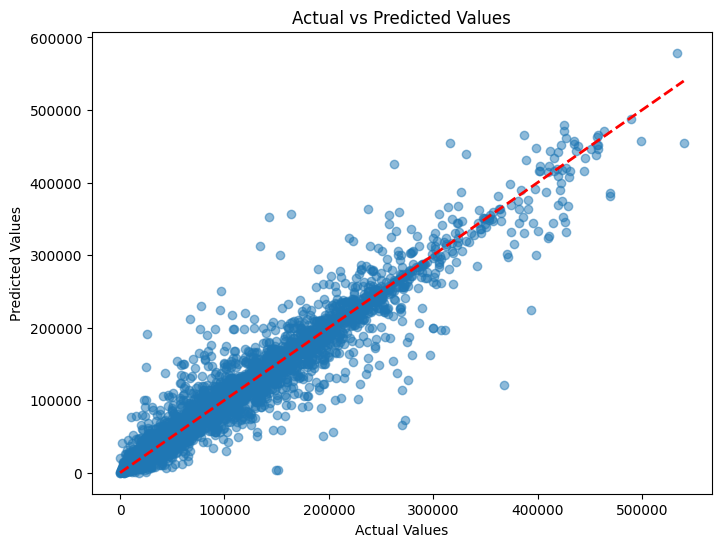

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.show()

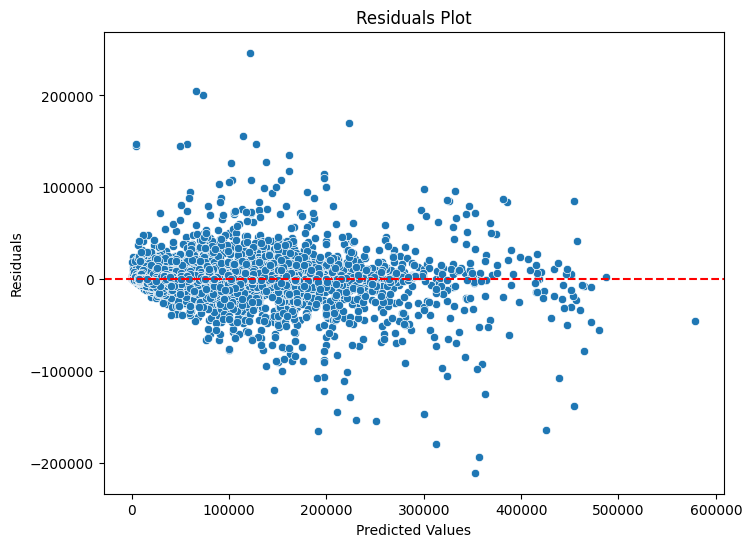

In [34]:

plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


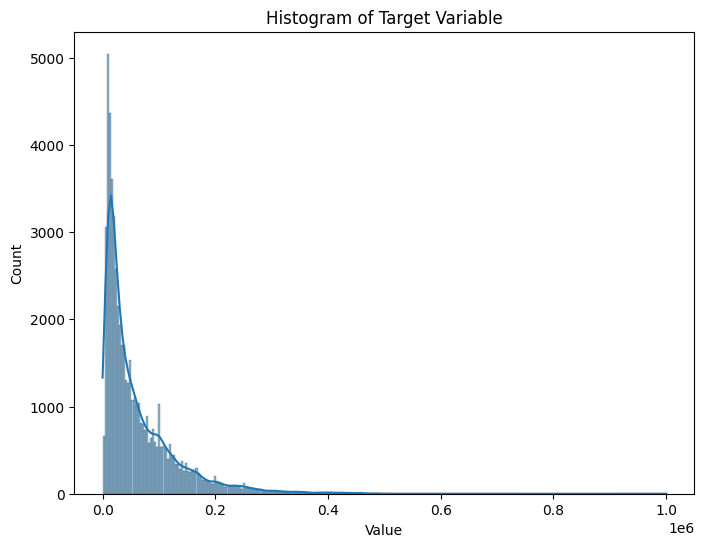

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.xlabel('Value')
plt.title('Histogram of Target Variable')
plt.show()

In [40]:
import numpy as np

rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
min_yield = data['Value'].min()
max_yield = data['Value'].max()

print("Minimum yield:", min_yield)
print("Maximum yield:", max_yield)

Root Mean Squared Error: 15209.156843432665
Minimum yield: 0
Maximum yield: 1000000
